# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

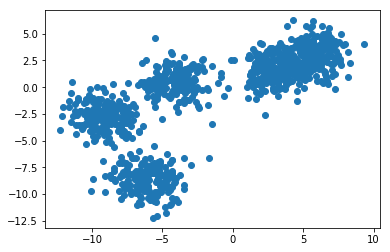

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [139]:
def get_center(cluster):
    return np.array([cluster[:,0].mean(), cluster[:,1].mean()])

def get_dist(point_1, point_2):
    return np.linalg.norm(point_1 - point_2)
                          
def get_clusters(X, centers):
    clusters = dict()
    for point in X:           
        best_cluster = min([(index, get_dist(point, center)) for index, center in enumerate(centers)],
                          key=lambda t:t[1])[0]
        try:
            clusters[best_cluster].append(point)
        except KeyError:
            clusters[best_cluster] = [point]
    return {key: np.array(clusters[key]) for key in clusters} 
                          
def get_new_value_centers(clusters):
    new_centers = list()
    for key in clusters:
        new_centers.append(np.mean(clusters[key], axis = 0))
    return np.array(new_centers)
                          
def get_cluster_plt(clusters):
    for key in clusters:
        plt.scatter(clusters[key][0:,0], clusters[key][0:,1])
    plt.show() 
                          
def k_means(X, k, early_stop, show_clusters=False):
    centers = np.array([get_center(cluster) for cluster in np.array_split(X, k)])
    eps = float("inf")
    while eps >= early_stop:
        clusters = get_clusters(X, centers)
        if show_clusters: get_cluster_plt(clusters)
        new_centers = get_new_value_centers(clusters)
        eps = sum([get_dist(centers[index], new_centers[index]) for index, _ in enumerate(new_centers)])
        centers = new_centers
    return clusters              

Сходимость центров кластеров

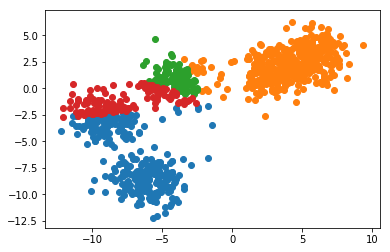

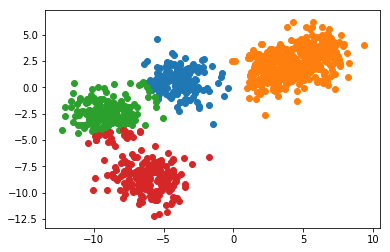

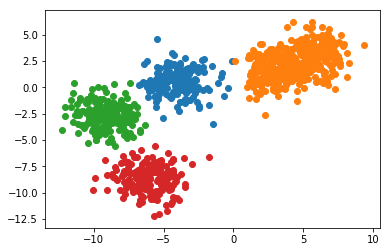

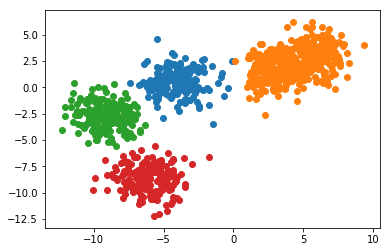

In [138]:
clusters = k_means(X, 4, 0.1, show_clusters=True)

Оценка SSE

In [152]:
def k_means_centers(X, k, early_stop, show_clusters=False):
    centers = np.array([get_center(cluster) for cluster in np.array_split(X, k)])
    eps = float("inf")
    while eps >= early_stop:
        clusters = get_clusters(X, centers)
        if show_clusters: get_cluster_plt(clusters)
        new_centers = get_new_value_centers(clusters)
        eps = sum([get_dist(centers[index], new_centers[index]) for index, _ in enumerate(new_centers)])
        centers = new_centers
    return centers

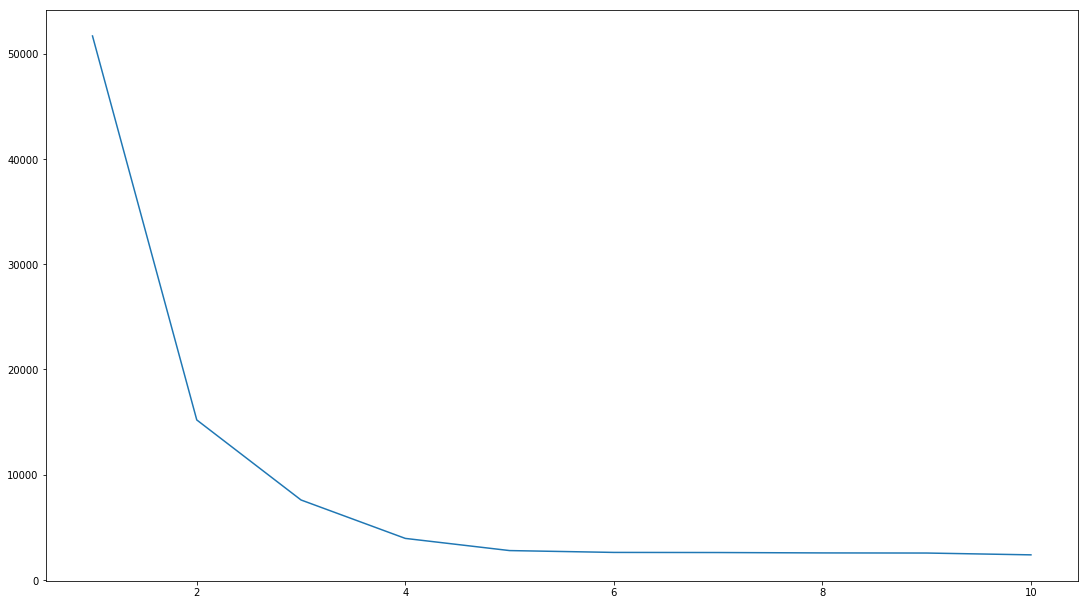

In [155]:
def get_sse(data,clusters):
    error = 0
    for j in range(len(data)):
        min_cluster_distance = min([distance.euclidean(clusters[i],data[j]) for i in range(len(clusters))])
        error = error + min_cluster_distance ** 2
    return error

k = list(range(1,11))
k_sse = [get_sse(X,k_means_centers(X,k[i],0.1)) for i in range(len(k))]

plt.plot(k, k_sse)
plt.gcf().set_size_inches(18.5, 10.5)

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [157]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [158]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [176]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(1,20,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [177]:
for i in range(len(inertia)):
    print(i+1,inertia[i]) 

1 303666.09226419945
2 238066.35809271294
3 203215.59994571476
4 188096.71848079565
5 176308.26383170072
6 166868.51967859885
7 160779.23246553304
8 155563.4221062198
9 150434.37152236237
10 146538.95858094987
11 143247.76194929198
12 140234.2185084517
13 137206.36955768696
14 134389.44205518265
15 132121.6934500015
16 129743.02831074157
17 127996.209894227
18 126181.09337907878
19 124530.70736049648


Оптимальное количество кластеров 15

In [173]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print(claster['Привод'].value_counts().head(1))
    print(claster['Марка'].value_counts().head(2))
    print(claster['Кузов'].value_counts().head(2))
    print(claster['КПП'].value_counts().head(2))
    print(claster['Хозяев в ПТС'].value_counts().head(2))
    print('---------------------------')

In [175]:
print('------ Реальность -------')
print(df['Год'].mean())
print(df['Пробег'].mean())
print(df['Объем'].mean())
print(df['Мощность'].mean())
print(df['Цена'].mean())
print(df['Привод'].value_counts().head(1))
print(df['Марка'].value_counts().head(2))
print(df['Кузов'].value_counts().head(2))
print(df['КПП'].value_counts().head(2))
print(df['Хозяев в ПТС'].value_counts().head(2))
print('---------------------------')

------ Реальность -------
2007.3700562551758
120830.33855906794
1877.595019846369
128.98960564265113
488987.6818298638
передний    23933
Name: Привод, dtype: int64
ВАЗ       5497
Toyota    2700
Name: Марка, dtype: int64
седан      14241
хэтчбек     8462
Name: Кузов, dtype: int64
механика    19308
автомат     13935
Name: КПП, dtype: int64
3 и более      12613
2 владельца    12070
Name: Хозяев в ПТС, dtype: int64
---------------------------


In [174]:
for it in range(16):
    cls_info(df, it)

------ Кластер  0  -------
2012.1751925192518
63387.76347634764
1542.7117711771177
104.2871287128713
432276.9573707371
передний    3525
Name: Привод, dtype: int64
ВАЗ        684
Renault    345
Name: Марка, dtype: int64
седан      1675
хэтчбек    1113
Name: Кузов, dtype: int64
механика            3556
роботизированная      60
Name: КПП, dtype: int64
1 владелец    3519
3 и более       75
Name: Хозяев в ПТС, dtype: int64
---------------------------
------ Кластер  1  -------
1998.067221067221
72930.8024948025
1722.3146223146223
84.61607761607762
86363.76507276508
задний    554
Name: Привод, dtype: int64
ВАЗ    889
УАЗ    143
Name: Марка, dtype: int64
седан          730
внедорожник    323
Name: Кузов, dtype: int64
механика    1383
автомат       60
Name: КПП, dtype: int64
3 и более      757
2 владельца    468
Name: Хозяев в ПТС, dtype: int64
---------------------------
------ Кластер  2  -------
2012.8614298323037
60326.43865842895
2132.8773168578996
171.48455428067078
1227472.0706090026
по

9 и 15 кластеры наиболее оптимальные, тк выдают приближенные к реальносит данные

## Работу выполнил
---
Студент группы **РИМ-181226**

Кабанов Евгений Алексеевич